#Introcuction to jupyter
Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

ModuleNotFoundError: No module named 'google.colab'

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

NameError: name 'auth' is not defined

In [3]:
downloaded = drive.CreateFile({'id':'1CnN9q63xEhvWlFDMDsGrBf1vwOCMHq4D'}) # replace the id with id of file you want to access
downloaded.GetContentFile('used_cars_data.csv') 

NameError: name 'drive' is not defined

#Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

#Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

#Let's start coding!

##Importing necessary libraries

In [4]:
!pip install nb_black

In [5]:
!pip install IPython.core.inputtransformer2

ERROR: Could not find a version that satisfies the requirement IPython.core.inputtransformer2
ERROR: No matching distribution found for IPython.core.inputtransformer2


In [6]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [7]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

In [8]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [9]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


##Observations

- `S.No.` is just an index for the data entry and will add no value to our analysis. So, we will drop it.

- `Name` contains a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

- `Mileage`, `Engine`, and `Power` columns will also need some processing before we are able to explore them. We'll have to extract numerical information from these columns.

- The `New_Price` column also needs some processing. This one also contains strings and a lot of missing values.

In [10]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [11]:
# drop the S.No. column as it does not add any value to the analysis
df.drop("S.No.", axis=1, inplace=True)

In [12]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


Observations

- Mileage, Engine, Power, and New_Price are object type columns when they should ideally be numerical.
- To be able to get summary statistics for these columns, we will have to process them first.

In [13]:
# checking for duplicate values
df.duplicated().sum()

1

- There is one duplicate value in the data.
- Let's take a closer look at it.

In [14]:
df[df.duplicated(keep=False) == True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


#Observations

- There is a good chance that two cars of the same build were sold in the same location.
- But it is highly unlikely that both of them will have the same number of kilometers driven.
So, we will drop the row which occurs second.

#Data Preprocessing

#Processing columns
- Let's process the Mileage, Engine, Power, and New_Price columns to extract numerical values from them.

1. Mileage

- We have car mileage in two units as per the data dictionary - kmpl and km/kg.

- After quick research on the internet, it is clear that these 2 units are used for cars of 2 different fuel types.

- kmpl (kilometers per liter) is used for petrol and diesel cars.
km/kg (kilometers per kg) is used for CNG and LPG-based engines.
We have the variable Fuel_type in our data. We will check if these observations hold true in our data too.

In [ ]:
# viewing the column values
df["Mileage"].head(10)

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
5    21.1 km/kg
6    23.08 kmpl
7    11.36 kmpl
8    20.54 kmpl
9     22.3 kmpl
Name: Mileage, dtype: object

In [ ]:
df_mileage = df["Mileage"].str.split(" ", expand=True)
df_mileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [ ]:
# let's verify that there are two units
df_mileage[1].value_counts()

kmpl     7177
km/kg      74
Name: 1, dtype: int64

In [ ]:
# we will create two new columns for mileage values and units
df["mileage_num"] = df_mileage[0].astype(float)
df["mileage_unit"] = df_mileage[1]

# Checking the new dataframe
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


In [ ]:
# Let's check if the units correspond to the fuel types
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

- As expected, km/kg is for CNG/LPG cars and kmpl is for Petrol and Diesel cars.

2. Engine

- As per the data dictionary, the Engine column indicates the displacement volume of the engine in CC.
Let's extract the numerical part of the column values.

In [ ]:
# viewing the column values
df["Engine"].head(10)

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
5     814 CC
6    1461 CC
7    2755 CC
8    1598 CC
9    1248 CC
Name: Engine, dtype: object

- The numeric values and units are separated by a space. We will split the values by space.

In [ ]:
df_engine = df["Engine"].str.split(" ", expand=True)
df_engine.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [ ]:
# let's verify that there is only one unit
df_engine[1].value_counts()

CC    7207
Name: 1, dtype: int64

In [ ]:
# we will create a new column for engine values
df["engine_num"] = df_engine[0].astype(float)

# Checking the new dataframe
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0


3. Power

- As per the data dictionary, the Power column indicates the maximum power of the engine in bhp.
- Let's extract the numerical part of the column values.

In [ ]:
# viewing the column values
df["Power"].head(10)

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
5     55.2 bhp
6     63.1 bhp
7    171.5 bhp
8    103.6 bhp
9       74 bhp
Name: Power, dtype: object

In [ ]:
df_power = df["Power"].str.split(" ", expand=True)
df_power.head()

,0,1
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp


In [ ]:
# let's verify that there is only one unit
df_power[1].value_counts()

bhp    7078
Name: 1, dtype: int64

In [ ]:
# we will create a new column for power values
df["power_num"] = df_power[0].astype(float)

# Checking the new dataframe
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80


4. New_Price

- We know that New_Price is the price of a new car of the same model in INR Lakhs (1 Lakh INR = 100, 000 INR)
- Let's extract the numerical part of the column values.

In [ ]:
# viewing the column values
df["New_Price"].head(10)

0          NaN
1          NaN
2    8.61 Lakh
3          NaN
4          NaN
5          NaN
6          NaN
7      21 Lakh
8          NaN
9          NaN
Name: New_Price, dtype: object

In [ ]:
df_new_price = df["New_Price"].str.split(" ", expand=True)
df_new_price.head()

,0,1
0,NaN,NaN
1,NaN,NaN
2,8.61,Lakh
3,NaN,NaN
4,NaN,NaN


In [ ]:
# let's verify that there is only one unit
df_new_price[1].value_counts()

Lakh    986
Cr       20
Name: 1, dtype: int64

- There are two units - Lakh and Cr.
- Let us convert all values to lakhs using the conversion rate 1 Cr = 100 Lakhs.

In [ ]:
# let's define a function to convert the New_Price column to float


def new_price_to_num(new_price_val):
    """
    This function takes in a string representing a new car price
    and converts it to a number. For example, '8.61 Lakh' becomes 8.61.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(new_price_val, str):  # checks if `new_price_val` is a string
        multiplier = 1  # handles Lakh vs Cr values
        if new_price_val.endswith("Lakh"):
            multiplier = 1
        elif new_price_val.endswith("Cr"):
            multiplier = 100
        return float(new_price_val.replace(" Lakh", "").replace(" Cr", "")) * multiplier
    else:  # this happens when the current new_price is np.nan
        return np.nan

In [ ]:
# let's apply the function to the New_Price column
df["new_price_num"] = df["New_Price"].apply(new_price_to_num)

# Checking the new dataframe
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN


- We have extracted numerical values from the Mileage, Engine, Power, and New_Price columns.

# Feature Engineering¶

- The Name column in the current format might not be very useful in our analysis.
- Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction.

In [ ]:
# checking number of unique values
df["Name"].nunique()

2041


- With 2041 unique names, car names are not going to be great predictors of the price in our current data.

- But we can process this column to extract important information and see if that reduces the number of levels for this information.

1. Car Brand Name

In [ ]:
# extracting brand names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16,NaN,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20,NaN,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70,8.61,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76,NaN,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN,audi


In [ ]:
# checking the unique values and their number of occurences
df["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
jeep               19
porsche            19
datsun             17
isuzu               5
force               3
bentley             2
ambassador          1
smart               1
hindustan           1
opelcorsa           1
lamborghini         1
Name: Brand, dtype: int64

- There are 32 brands of cars in the data.

2. Car Model Name

In [ ]:
# extracting model names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16,NaN,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20,NaN,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70,8.61,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76,NaN,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN,audi,a4


In [ ]:
# checking the unique values and their number of occurences
df["Model"].value_counts()

swift     418
city      318
i20       303
innova    203
verna     200
         ... 
redi        1
prius       1
1000        1
xuv300      1
beetle      1
Name: Model, Length: 218, dtype: int64

- There are 218 different car models in the data.

#### Before we start exploring the data further, let's quickly check the missingness in the data.

In [ ]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
mileage_num             2
mileage_unit            2
engine_num             46
power_num             175
new_price_num        6247
Brand                   0
Model                   0
dtype: int64

### Observations

- 2 cars don't have entries for Mileage.

- Engine displacement information of 46 observations is missing, the maximum power of 175 entries is missing, and information about the number of seats is not available for 53 entries.

- The new price is missing for 6247 cars in the dataset. We'll have to see if there is a pattern here to determine if we can impute these or if we should drop this column altogether.

- Price is also missing for 1234 entries. Since price is the response variable that we want to predict, we will have to drop these rows when we actually build a model.

- These rows will not be able to help us in modeling or model evaluation. But while we are analyzing the distributions and doing missing value imputations, we will keep using information from these rows.

In [ ]:
# dropping the redundant columns.
df.drop(columns=["Mileage", "Engine", "Power", "New_Price"], inplace=True)

#Exploratory Data Analysis

####Let's check the statistical summary of the numerical variables.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
mileage_num,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
engine_num,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power_num,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


####Observations

- Kilometers_Driven values have an incredibly high range. We should check a few of the extreme values to get a sense of the data.

- The minimum and the maximum number of seats in the car also warrant a quick check. On average, a car seems to have 5 seats, which is about right.

- We have used cars being sold at less than a lakh INR and as high as 160 lakh INR, as we saw for the Lamborghini earlier. We might have to check for outliers to build a robust model.

- The minimum mileage being 0 is also concerning. We'll have to check what is going on.

- Engine and Power mean and median values are not very different. Only someone with more domain knowledge would be able to comment further on these attributes.

- The new price range seems right. We have both budget-friendly Maruti cars and Lamborghinis in our stock. Mean being twice that of the median suggests that there are only a few very high range brands, which again makes sense.

In [ ]:
# checking extreme values in Kilometers_Driven
df.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,5.0,65.00,15.97,kmpl,2993.0,258.00,NaN,bmw,x5
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,5.0,7.50,19.30,kmpl,1968.0,141.00,NaN,skoda,octavia
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,5.0,5.90,20.54,kmpl,1598.0,103.60,NaN,volkswagen,vento
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,5.0,2.70,20.36,kmpl,1197.0,78.90,NaN,hyundai,i10
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,5.0,13.00,16.96,kmpl,1968.0,138.03,NaN,volkswagen,jetta
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,5.0,5.00,17.40,kmpl,1497.0,117.30,NaN,honda,city
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,5.0,4.45,18.50,kmpl,1197.0,82.90,NaN,hyundai,i20
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,5.0,NaN,23.40,kmpl,1248.0,74.00,NaN,maruti,swift
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,5.0,1.00,17.00,kmpl,1405.0,70.00,NaN,tata,indigo
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,8.0,4.00,12.80,kmpl,2494.0,102.00,NaN,toyota,innova


####Observations

- It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 65,00,000 km is almost impossible.

- The other observations that follow are also on a higher end. There is a good chance that these are outliers. We'll look at this further while doing the univariate analysis.

In [ ]:
# checking extreme values in Kilometers_Driven
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,5.0,3.60,24.70,kmpl,796.0,47.30,NaN,maruti,alto
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,5.0,6.25,21.50,kmpl,1197.0,81.80,6.80,maruti,wagon
1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,5.0,5.68,18.78,kmpl,999.0,75.00,6.74,volkswagen,polo
5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,5.0,3.40,25.17,kmpl,799.0,53.30,4.45,renault,kwid
6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,5.0,NaN,24.70,kmpl,796.0,47.30,3.99,maruti,alto
1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,5.0,6.85,20.30,kmpl,1199.0,84.00,NaN,tata,tigor
1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,5.0,7.50,13.49,kmpl,2179.0,138.03,NaN,tata,xenon
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,5.0,6.50,18.90,kmpl,1197.0,81.86,7.39,hyundai,grand
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,5.0,40.00,13.60,kmpl,1999.0,177.00,52.77,jaguar,xe
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,5.0,8.60,17.19,kmpl,1197.0,81.86,10.25,hyundai,i20


#####Observations

- After looking at the columns Year, New_Price, and Price, these entries seem feasible.

- 1000 might be the default value in this case. Quite a few cars having driven exactly 1000 km is suspicious.

In [ ]:
# checking extreme values in Seats
df.sort_values(by=["Seats"], ascending=True).head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,0.0,18.00,10.5,kmpl,3197.0,NaN,NaN,audi,a4
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,2.0,55.54,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,2.0,55.00,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,2.0,120.00,6.4,kmpl,5204.0,560.0,NaN,lamborghini,gallardo
4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,2.0,29.50,8.1,kmpl,5461.0,387.3,NaN,mercedes-benz,sl-class


###Observations

- Audi A4 having 0 seats is clearly a data entry error.
- This column warrants some outlier treatment, or we can treat Seats = 0 as a missing value.
- Overall, there doesn't seem not much to be concerned about here.
Let's check if we have a similar car in our dataset.

In [ ]:
df[df["Name"].str.startswith("Audi A4")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,kmpl,1968.0,140.80,NaN,audi,a4
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,5.0,21.43,17.11,kmpl,1968.0,174.33,NaN,audi,a4
65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,5.0,13.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,5.0,9.80,14.94,kmpl,2967.0,241.40,NaN,audi,a4
150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,5.0,23.32,17.11,kmpl,1968.0,174.33,NaN,audi,a4
717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979,Diesel,Automatic,Second,5.0,19.50,17.11,kmpl,1968.0,174.33,NaN,audi,a4
853,Audi A4 2.0 TDI,Delhi,2011,46000,Diesel,Automatic,Second,5.0,10.99,16.55,kmpl,1968.0,147.51,NaN,audi,a4
854,Audi A4 2.0 TDI,Kolkata,2012,47346,Diesel,Automatic,First,5.0,14.50,16.55,kmpl,1968.0,147.51,NaN,audi,a4
874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000,Diesel,Automatic,First,5.0,12.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
964,Audi A4 2.0 TDI,Kolkata,2009,34000,Diesel,Automatic,First,5.0,9.95,16.55,kmpl,1968.0,147.51,NaN,audi,a4


- Looks like an Audi A4 typically has 5 seats.

In [ ]:
# Let us replace #seats in row index 3999 form 0 to 5
df.loc[3999, "Seats"] = 5.0

In [ ]:
# checking extreme values in Seats
df.sort_values(by=["Seats"], ascending=False).head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,10.0,5.50,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,10.0,3.65,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis
6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,10.0,NaN,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,10.0,NaN,12.2,kmpl,1948.0,68.0,NaN,tata,sumo
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,10.0,3.50,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis


- A Toyota Qualis does have 10 seats and so does a Tata Sumo. We don't see any data entry error here.

In [ ]:
# checking extreme values in Mileage
df.sort_values(by=["mileage_num"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,5.0,1.12,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,5.0,2.30,0.0,kmpl,999.0,NaN,NaN,hyundai,santro
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,NaN,1.85,0.0,kmpl,NaN,NaN,NaN,honda,city
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,5.0,5.45,0.0,kmpl,1968.0,NaN,NaN,volkswagen,jetta
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,5.0,NaN,0.0,kmpl,2179.0,115.0,NaN,land,rover
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,5.0,3.35,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,5.0,1.17,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,5.0,26.00,0.0,kmpl,2179.0,115.0,NaN,land,rover
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,5.0,15.50,0.0,kmpl,2179.0,115.0,NaN,land,rover
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,NaN,3.15,0.0,kmpl,NaN,NaN,NaN,hyundai,santro


- We will have to treat Mileage = 0 as missing values

In [ ]:
# checking extreme values in Mileage
df.sort_values(by=["mileage_num"], ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,5.0,2.96,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,5.0,3.05,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,5.0,3.90,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,5.0,3.25,33.54,km/kg,998.0,67.04,5.35,maruti,wagon
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,5.0,2.85,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,4.0,2.10,33.44,km/kg,796.0,40.30,NaN,maruti,alto
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,4.0,3.50,33.44,km/kg,796.0,40.30,NaN,maruti,alto
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,4.0,3.00,33.44,km/kg,796.0,40.30,NaN,maruti,alto
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,4.0,3.70,33.44,km/kg,796.0,40.30,NaN,maruti,alto
6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,4.0,NaN,32.26,km/kg,998.0,58.20,NaN,maruti,alto


- Maruti Wagon R and Maruti Alto CNG versions are budget-friendly cars with high mileage, so these data points are fine.

In [ ]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Toyota Fortuner 3.0 Diesel    35
Maruti Ritz VDi               35
Honda Amaze S i-Dtech         32
Honda City 1.5 V MT           32
Hyundai Grand i10 Sportz      32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.
-------------------------------------------------- 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
-------------

- We had checked cars of different Fuel_Type earlier, but we did not encounter the 2 electric cars. Let us check why.

In [ ]:
df.loc[df["Fuel_Type"] == "Electric"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,5.0,13.00,NaN,NaN,72.0,41.0,13.58,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,5.0,12.75,NaN,NaN,1798.0,73.0,NaN,toyota,prius


##### Observations

- Mileage values for these cars are NaN, that's why we did not encounter these earlier with groupby().

- Electric cars are very new in the market and very rare in our dataset. We can consider dropping these two observations if they turn out to be outliers later.

- There is a good chance that we will not be able to create a good price prediction model for electric cars with the currently available data.

In [ ]:
# checking used ar prices grouped by brand
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

#### Observations

- The output is very close to our expectation (domain knowledge) in terms of brand order.
- The mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in descending order.
- Towards the bottom end, we have the more budget-friendly brands.

#Univariate Analysis

***Price***

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

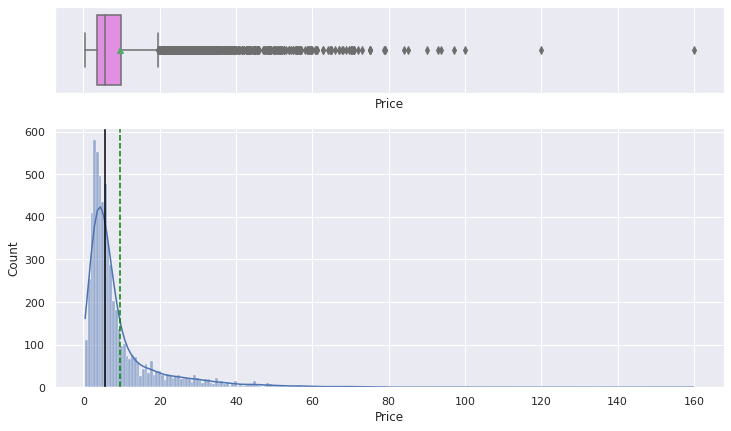

In [ ]:
histogram_boxplot(df, "Price", kde=True)

Observations

- This is a highly skewed distribution.
- Let us use log transformation on this column to see if that helps normalize the distribution.

In [ ]:
# Creating a new column with the transformed variable
df["price_log"] = np.log(df["Price"])

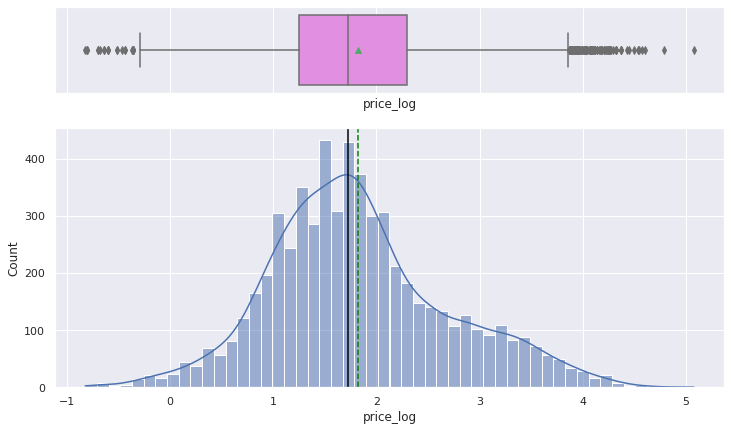

In [ ]:
histogram_boxplot(df, "price_log", kde=True)

- Using the log transformation has definitely helped in reducing the skew.

# Kilometers_Driven

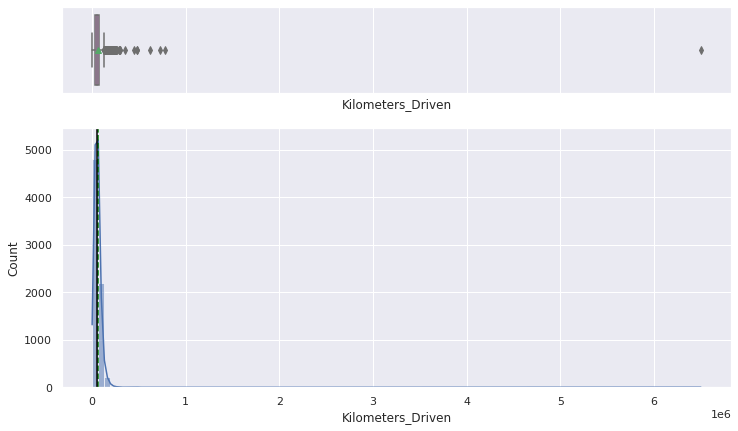

In [ ]:
histogram_boxplot(df, "Kilometers_Driven", bins=100, kde=True)

Observations

- This is another highly skewed distribution.
- Let us use log transformation on this column too.

In [ ]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

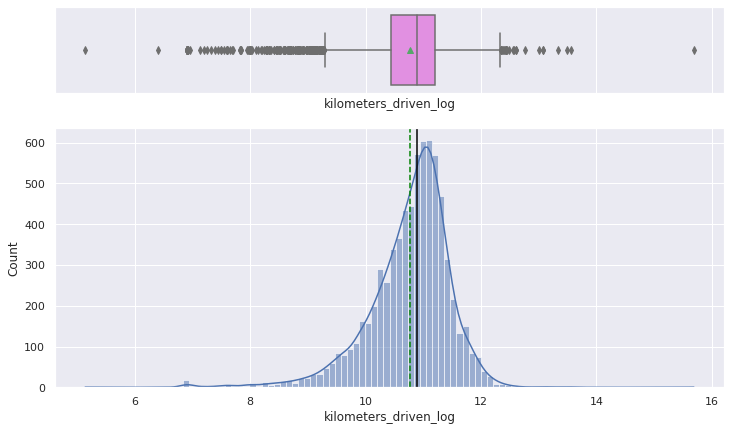

In [ ]:
histogram_boxplot(df, "kilometers_driven_log", bins=100, kde=True)

Transformation has reduced the extreme skewness.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

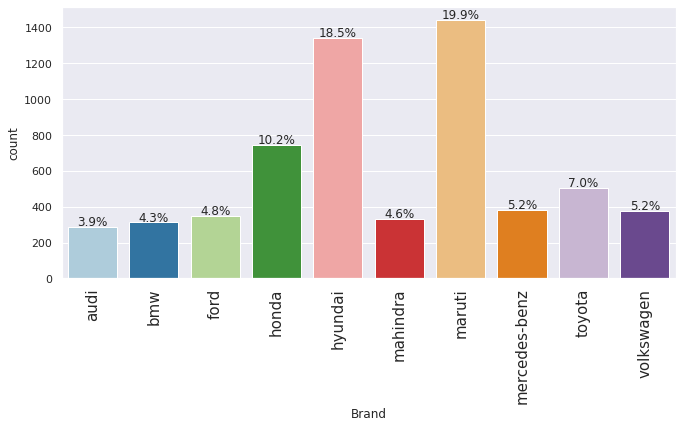

In [ ]:
labeled_barplot(df, "Brand", perc=True, n=10)

Observations

Maruti Swift is the most common car up for resale.

It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands.

We can create a new variable using this information. We can consider binning all our cars into the following 3 categories later:

Budget-Friendly
Mid Range
Luxury Cars

In [ ]:
# dropping the redundant columns
df.drop(columns=["Kilometers_Driven", "Name", "mileage_unit"], inplace=True)

`Bivariate` Distributions

Let's check the correlation between numerical variables.

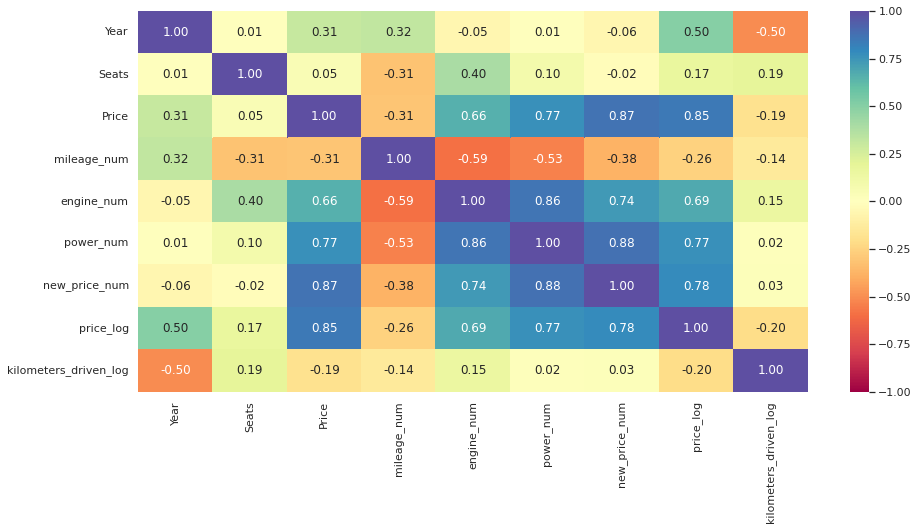

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations

Power and Engine are important predictors of price, but they are also highly correlated to each other.
We will have to work on imputing the missing values in New_Price because this is a very important feature in predicting the used car price accurately.


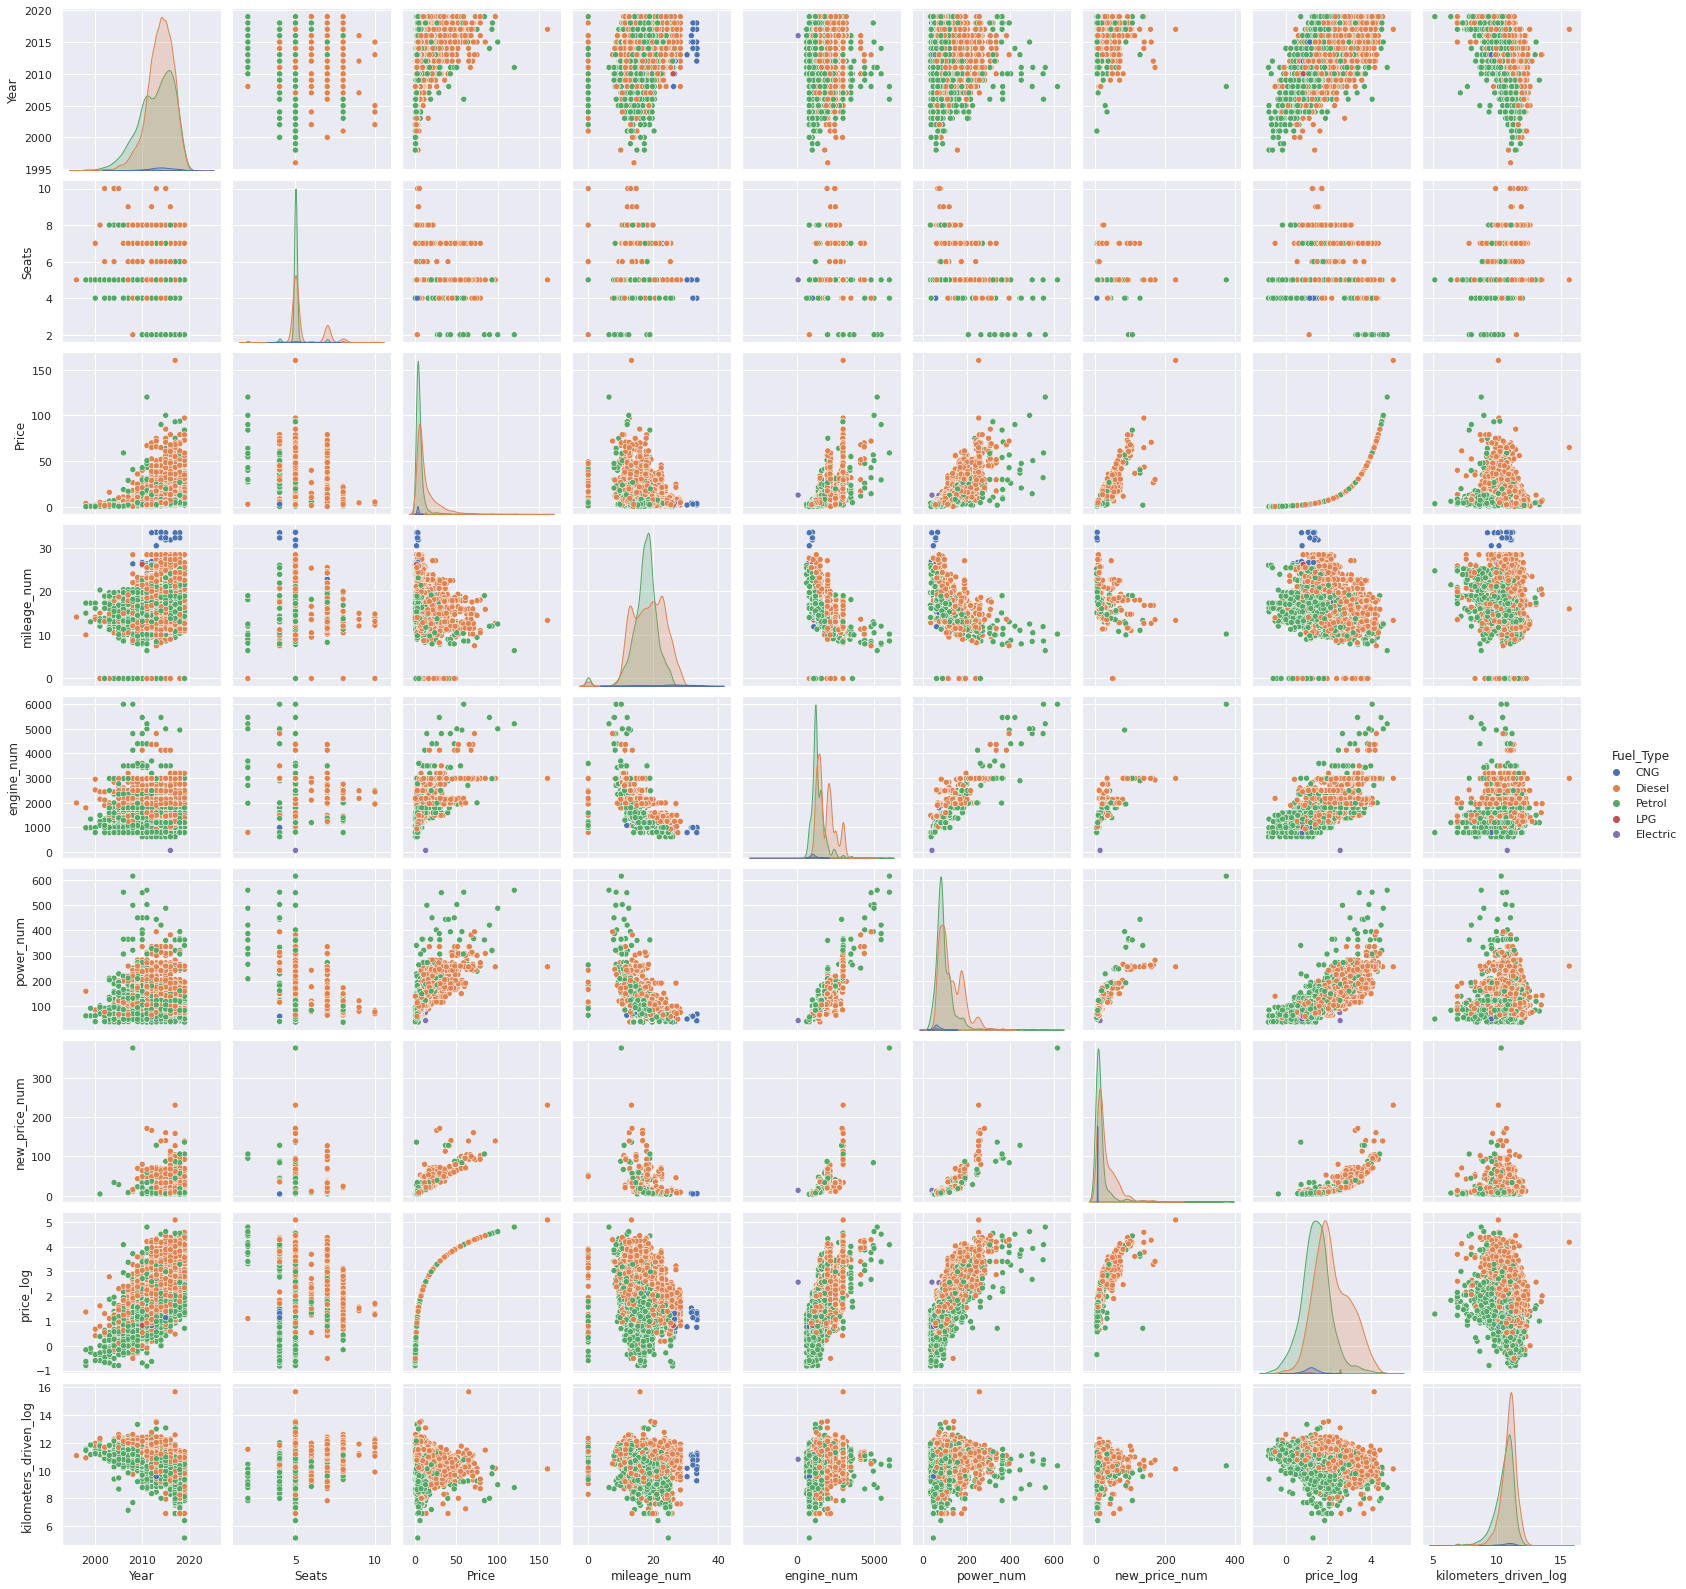

In [ ]:
sns.pairplot(data=df, hue="Fuel_Type")
plt.show()

Observations

Zooming into these plots gives us a lot of information.

Contrary to intuition, Kilometers_Driven does not seem to have a relationship with the price.
Price has a positive relationship with Year, i.e., the newer the car, the higher the price.
The temporal element of variation is captured in the year column.
S.No. does not capture any information that we were hoping for.
2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
Mileage does not seem to show much relationship with the price of used cars.
Engine displacement and power of the car have a positive relationship with the price.
New_Price and used car price are also positively correlated, which is expected.
Kilometers_Driven has a peculiar relationship with the Year variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
CNG cars are conspicuous outliers when it comes to Mileage. The mileage of these cars is very high.
The mileage and power of newer cars are increasing owing to advancements in technology.
Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

Let's check the variation in Price with some of the other variables.

Price vs Location

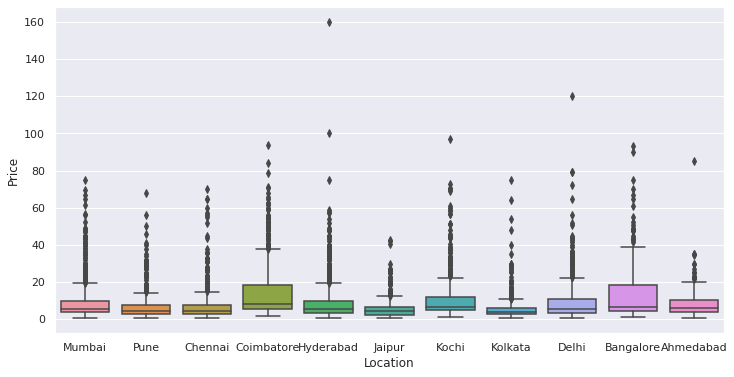

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Price", data=df)
plt.show()

The price of used cars has a large IQR in Coimbatore and Bangalore.

Price vs Transmission

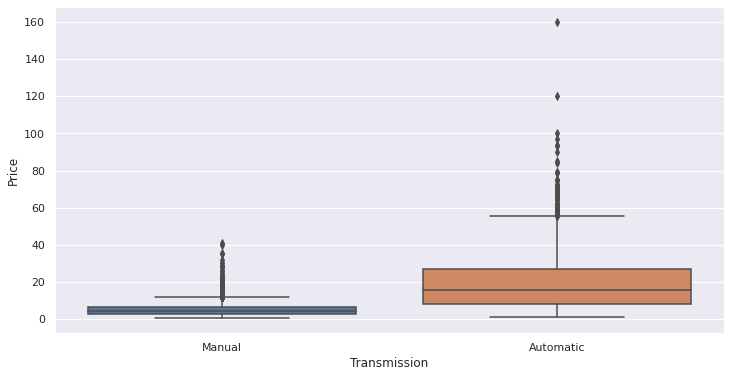

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.show()

The price is higher for used cars with automatic transmission.

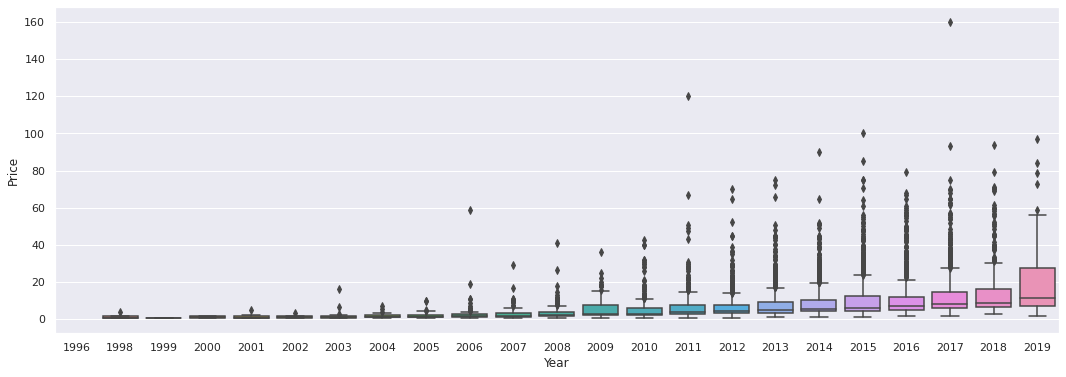

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(x="Year", y="Price", data=df)
plt.show()

The price of used cars has increased over the years.

#Data Preprocessing (contd.)

##Missing Value Treatment


In [ ]:
# let's check again for missing values
df.isnull().sum()


Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
Price                    1234
mileage_num                 2
engine_num                 46
power_num                 175
new_price_num            6247
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

###Let's look at a few rows where number of seats is missing.

In [ ]:
df[df["Seats"].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
194,Ahmedabad,2007,Petrol,Manual,First,NaN,2.95,0.00,NaN,NaN,NaN,honda,city,1.081805,11.002200
208,Kolkata,2010,Petrol,Manual,First,NaN,2.11,16.10,NaN,NaN,NaN,maruti,swift,0.746688,10.645449
229,Bangalore,2015,Diesel,Manual,First,NaN,3.60,0.00,1498.0,99.0,NaN,ford,figo,1.280934,11.162460
733,Chennai,2006,Petrol,Manual,Third,NaN,1.75,16.10,NaN,NaN,NaN,maruti,swift,0.559616,11.490680
749,Mumbai,2008,Diesel,Automatic,Second,NaN,26.50,0.00,NaN,NaN,NaN,land,rover,3.277145,10.915107
1294,Delhi,2009,Petrol,Manual,First,NaN,3.20,12.80,NaN,NaN,NaN,honda,city,1.163151,10.915179
1327,Hyderabad,2015,Petrol,Manual,First,NaN,5.80,16.10,NaN,NaN,NaN,maruti,swift,1.757858,10.825661
1385,Pune,2004,Petrol,Manual,Second,NaN,1.50,0.00,NaN,NaN,NaN,honda,city,0.405465,11.652687
1460,Coimbatore,2008,Petrol,Manual,First,NaN,40.88,0.00,NaN,NaN,NaN,land,rover,3.710641,11.142992
1917,Jaipur,2005,Petrol,Manual,Second,NaN,1.70,13.00,1493.0,100.0,NaN,honda,city,0.530628,11.385092


We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the Brand and Model name.

In [ ]:
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [ ]:
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage_num,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
2369,Chennai,2008,Petrol,Manual,Second,NaN,1.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.405465,10.933107
3882,Kolkata,2010,Petrol,Manual,Second,NaN,2.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.916291,10.596635
5893,Chennai,2008,Petrol,Manual,Second,NaN,1.75,19.5,1061.0,NaN,NaN,maruti,estilo,0.559616,10.839581


Maruti Estilo can accommodate 5 people.

In [ ]:
df["Seats"] = df["Seats"].fillna(5.0)

#### We will use a similar method to fill missing values for the Mileage, engine_num, power_num, and new_price_num columns.

In [ ]:
cols_list = ["mileage_num", "engine_num", "power_num", "new_price_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
mileage_num                 2
engine_num                  0
power_num                  12
new_price_num            1512
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

- There are still some missing values in Mileage, power_num, and new_price_num.
- There are a few car brands and models in our dataset that do not contain the new price information at all.
- We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the Brand name.

In [ ]:
cols_list = ["mileage_num", "power_num", "new_price_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
mileage_num                 0
engine_num                  0
power_num                   2
new_price_num             159
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

There are still some missing values in power_num and new_price_num.
We'll impute these missing values using the median of the data.

In [ ]:
cols_list = ["power_num", "new_price_num"]

for col in cols_list:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
mileage_num                 0
engine_num                  0
power_num                   0
new_price_num               0
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

Missing values in all columns except Price and price_log are imputed.
We will drop the rows where Price is missing.

In [ ]:
df = df[df["Price"].notna()]

Linear Model Building
We want to predict the used car price, so we will use the normalized version price_log for modeling.

Before we proceed to build a model, we'll have to encode categorical features.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check it's performance.

In [ ]:
# defining the dependent and independent variables
X = df.drop(["Price", "price_log"], axis=1)
y = df["price_log"]

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Seats,mileage_num,engine_num,power_num,new_price_num,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,5.0,26.60,998.0,58.16,5.51,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,5.0,19.67,1582.0,126.20,16.06,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


In [ ]:
# fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.106357
Seats,0.003755
mileage_num,-0.000140
engine_num,-0.000124
power_num,0.003030
...,...
Model_yeti,0.252915
Model_z4,0.809548
Model_zen,-0.431409
Model_zest,-0.380183


#Model Performance Check
-We will check the model performance on the actual prices and not the log values.
- We will create a function that will convert the log prices to actual prices and then check the performance.
- We will be using metric functions defined in sklearn for RMSE, MAE, and  𝑅2 .
- We will define a function to calculate MAPE and adjusted  𝑅2 .
The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.726211,1.196561,0.941875,0.937989,12.983262


In [ ]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.726211,1.196561,0.941875,0.937989,12.983262


* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in the price of used cars up to 94%.

* The model is not an underfitting model.

* Let's do a quick performance check on the test data.

In [ ]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.238137,1.335421,0.911704,0.896577,12.981936


Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) of train and test data are close, which indicates that our model is not overfitting the train data.

MAE indicates that our current model is able to predict used car prices within a mean error of 1.3 lakhs on test data.

The units of both RMSE and MAE are the same, Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.

MAPE of 12.98 on the test data indicates that the model can predict within ~13% of the used car price.

Our current model is extremely complex. Let us bin the Brand and Model columns to make the dataset more manageable.

In [ ]:
df.groupby(["Brand", "Model"])["new_price_num"].mean().sort_values(ascending=False)

Brand          Model      
bentley        continental    375.000000
mercedes-benz  s-class        171.000000
bmw            7              157.230769
porsche        panamera       136.000000
               cayman         136.000000
                                 ...    
maruti         eeco             4.900000
renault        kwid             4.794750
hyundai        santro           4.550000
maruti         alto             4.366364
datsun         redi-go          4.153333
Name: new_price_num, Length: 215, dtype: float64

We will create a new variable car_category by binning the new_price_num column.

In [ ]:
# creating a copy of the dataframe
df1 = df.copy()

# creating a new variable car_category
df1["car_category"] = pd.cut(
    x=df["new_price_num"],
    bins=[0, 15, 30, 50, 200],
    labels=["Budget_Friendly", "Mid-Range", "Luxury_Cars", "Ultra_luxury"],
)

df1.car_category.value_counts()

Budget_Friendly    3953
Mid-Range           820
Ultra_luxury        665
Luxury_Cars         579
Name: car_category, dtype: int64

In [ ]:
# dropping the Brand and Model columns
df1.drop(columns=["Brand", "Model"], axis=1, inplace=True)

In [ ]:
# defining the dependent and independent variables
X = df1.drop(["Price", "price_log"], axis=1)
y = df1["price_log"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# split the data into train and test
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


In [ ]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.933326,1.896628,0.809664,0.80839,21.660892


In [ ]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.455797,1.682408,0.899435,0.89785,18.883292


The training performance has dropped drastically after binning the columns together.
The test performance, however, remains close to the previous one.

#Forward Feature Selection

Let us try using forward feature selection on the data before binning columns to check if we can get a good model performance using a lesser number of features.

Let us try using forward feature selection on the data before binning columns to check if we can get a good model performance using a lesser number of features.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    2.9s finished

[2021-10-12 08:47:00] Features: 1/264 -- score: 0.5742558515529482[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:    1.9s finished

[2021-10-12 08:47:02] Features: 2/264 -- score: 0.808680455900561[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 262 out of 262 | elapsed:    1.9s finished

[2021-10-12 08:47:04] Features: 3/264 -- score: 0.8392984792349478[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    2.0s finished

[2021-10-12 08:47:06] Features: 4/264 -- score: 0.8615384747563368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parall